In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [72]:
df = sns.load_dataset("titanic")

In [73]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [75]:
df.duplicated().sum()

np.int64(107)

In [76]:
df.shape

(891, 15)

In [77]:
df = df.drop_duplicates()

In [78]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [79]:
df = df.drop(['embark_town', 'deck', 'alone'], axis=1)

In [80]:
df['age'] = df['age'].fillna(df['age'].mean())

In [81]:
df['embarked'] = df['embarked'].ffill()

In [82]:
df['class'].value_counts()

class
Third     405
First     214
Second    165
Name: count, dtype: int64

In [83]:
le = LabelEncoder()

In [84]:
for col in df.columns:
    if not is_numeric_dtype(df[col]):
        df[col] = le.fit_transform(df[[col]])

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocess

In [85]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,1
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,1
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,0


In [86]:
df['adult_male'] = df['adult_male'].astype('int')

In [87]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,1
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,1
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,0


<Axes: >

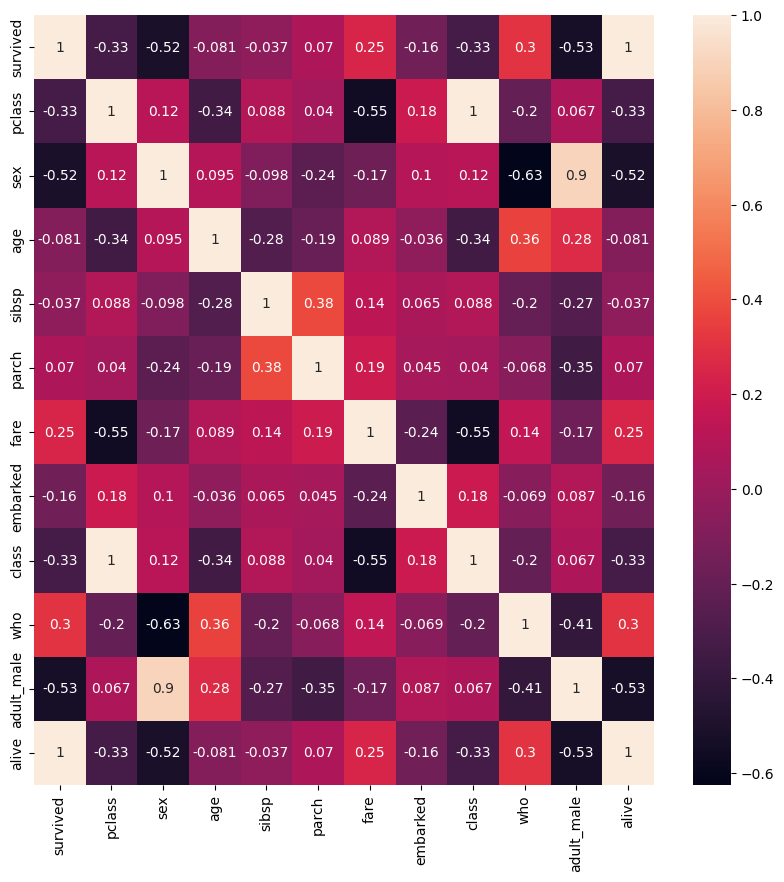

In [89]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

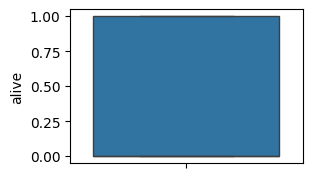

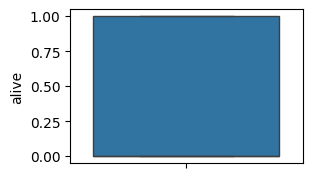

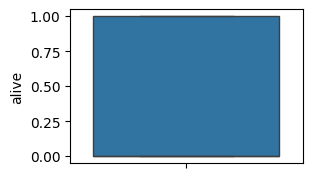

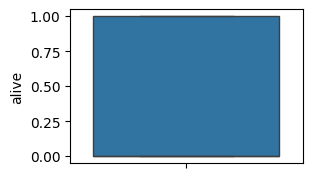

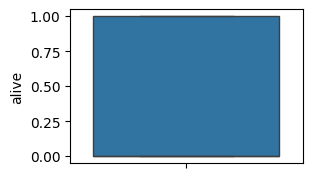

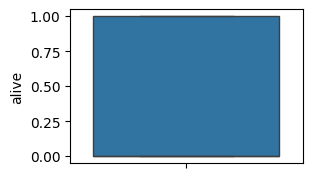

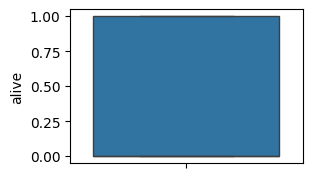

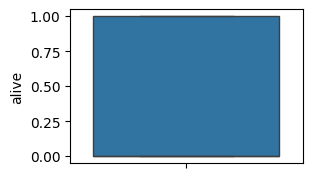

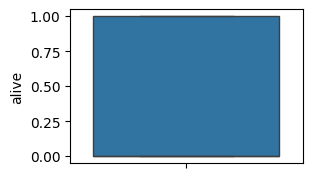

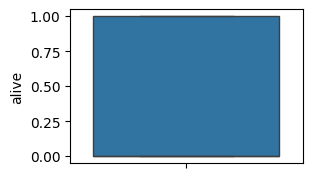

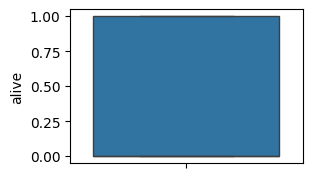

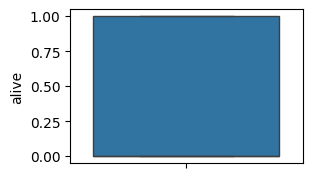

In [91]:
for col2 in df.columns:
    plt.figure(figsize=(3,2))
    sns.boxplot(df[col])
    plt.show()

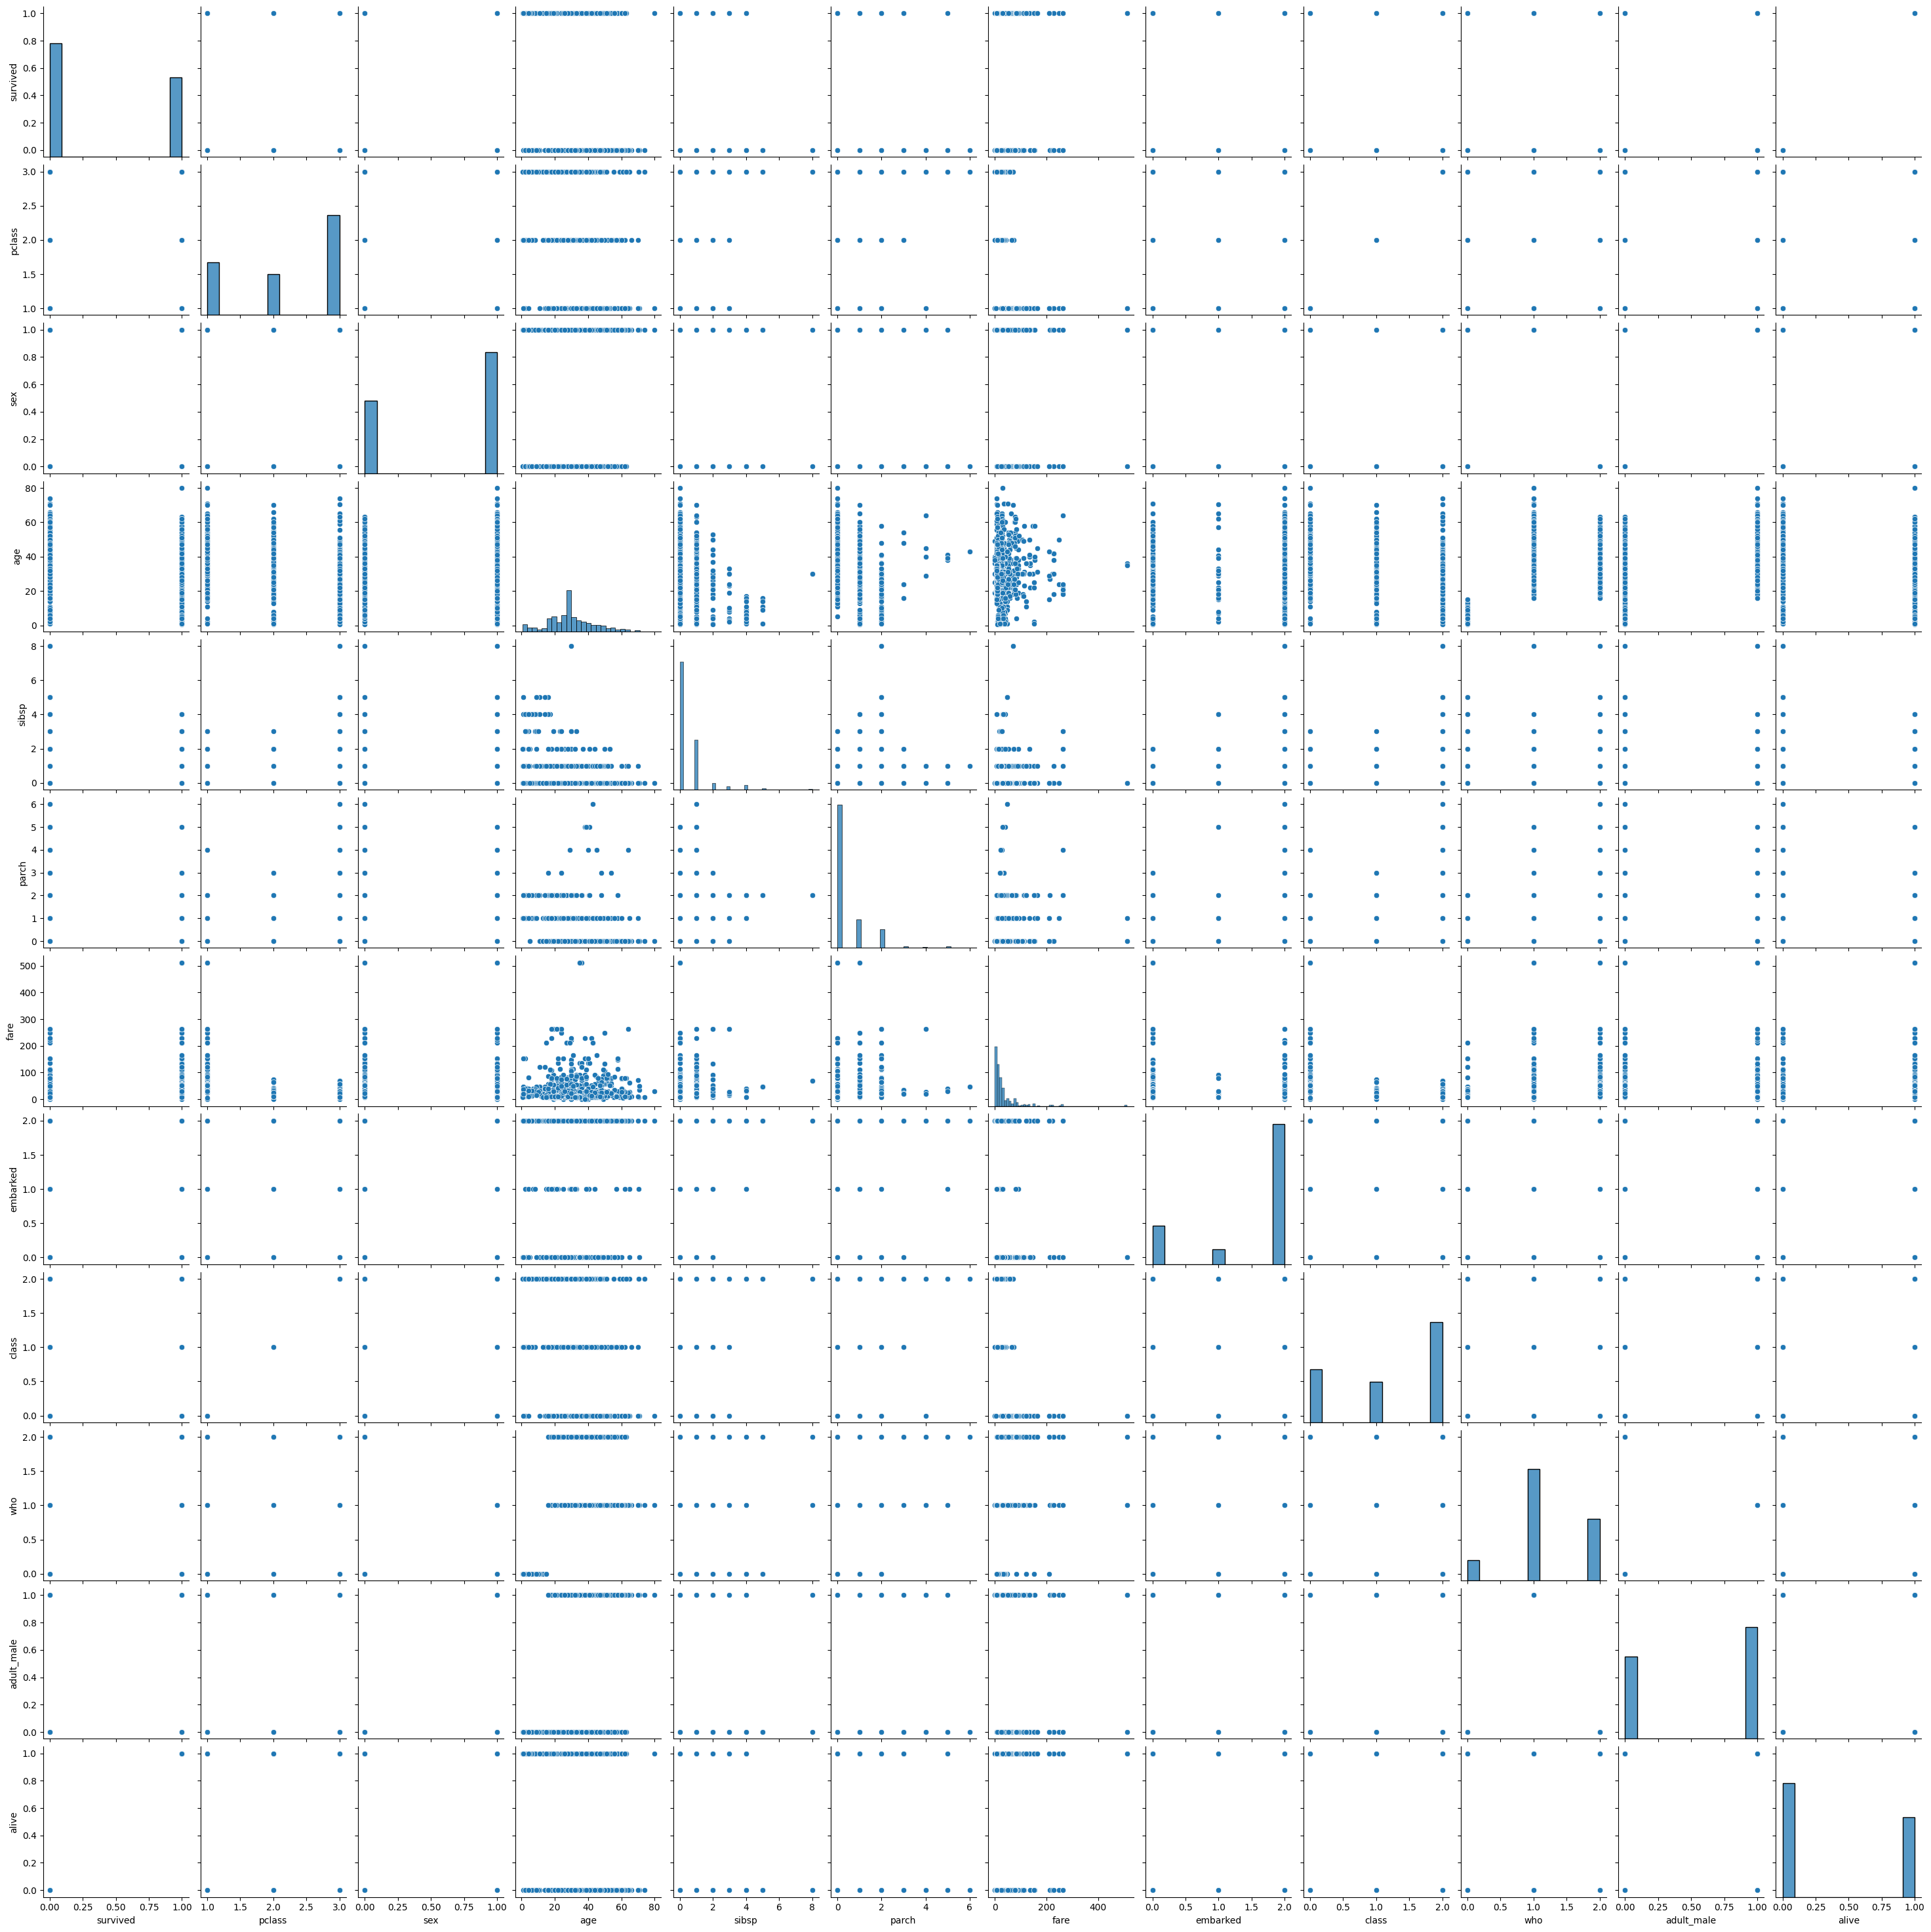

In [92]:
sns.pairplot(df)
plt.show()

In [93]:
#feature / target split 
x = df.drop(['fare'], axis=1)
y = df[['fare']]

In [94]:
x.head()

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,alive
0,0,3,1,22.0,1,0,2,2,1,1,0
1,1,1,0,38.0,1,0,0,0,2,0,1
2,1,3,0,26.0,0,0,2,2,2,0,1
3,1,1,0,35.0,1,0,2,0,2,0,1
4,0,3,1,35.0,0,0,2,2,1,1,0


In [95]:
#train test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [96]:
xtrain.head()

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,alive
864,0,2,1,24.000000,0,0,2,1,1,1,0
141,1,3,0,22.000000,0,0,2,2,2,0,1
730,1,1,0,29.000000,0,0,2,0,2,0,1
56,1,2,0,21.000000,0,0,2,1,2,0,1
451,0,3,1,29.869351,1,0,2,2,1,1,0


In [97]:
ytrain.head()

,fare
864,13.0000
141,7.7500
730,211.3375
56,10.5000
451,19.9667


In [98]:
#model implementation
models = {'Linear Model': LinearRegression(),
          'Ridge Model': Ridge(),
          'Lasso Model': Lasso(),
          'KNNR Model': KNeighborsRegressor()}